#### reading the CSV 

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from datetime import datetime
import seaborn as sns
from sklearn.metrics import confusion_matrix
import time
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt


data = pd.read_csv("csv")
data

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andaman and Nicobar,South Andaman,Port Blair,Amaranthus,Amaranthus,04/03/2019,6000,8000,7000
1,Andaman and Nicobar,South Andaman,Port Blair,Banana - Green,Banana - Green,04/03/2019,4500,5500,5000
2,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,04/03/2019,6000,8000,7000
3,Andaman and Nicobar,South Andaman,Port Blair,Bitter gourd,Other,04/03/2019,6000,8000,7000
4,Andaman and Nicobar,South Andaman,Port Blair,Black pepper,Other,04/03/2019,110000,130000,120000
...,...,...,...,...,...,...,...,...,...
2233,West Bengal,Uttar Dinajpur,Islampur,Potato,Jyoti,04/03/2019,530,570,550
2234,West Bengal,Uttar Dinajpur,Islampur,Rice,Other,04/03/2019,3550,3650,3600
2235,West Bengal,Uttar Dinajpur,Raiganj,Jute,TD-5,04/03/2019,4400,4600,4500
2236,West Bengal,Uttar Dinajpur,Raiganj,Rice,Other,04/03/2019,3450,3550,3500


In [2]:
# Convert the 'arrival_date' column to Unix timestamps
data['arrival_date'] = data['arrival_date'].apply(lambda x: time.mktime(datetime.strptime(x, '%d/%m/%Y').timetuple()))


In [3]:
# Convert categorical data to numerical data
le = LabelEncoder()
data["state"] = le.fit_transform(data["state"])
data["district"] = le.fit_transform(data["district"])
data["market"] = le.fit_transform(data["market"])
data["commodity"] = le.fit_transform(data["commodity"])
data["variety"] = le.fit_transform(data["variety"])

# Support Vector Regression (SVR)

In [4]:
# Split the data into training and testing sets
X = data.drop("modal_price", axis=1)
y = data["modal_price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# One-hot encode the categorical data
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(handle_unknown='ignore'), [0, 1, 2, 3, 4])], remainder='passthrough')
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test).toarray()

# Create the SVR model and train it
regressor = SVR(kernel="rbf")
regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = regressor.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 2203.634923294448


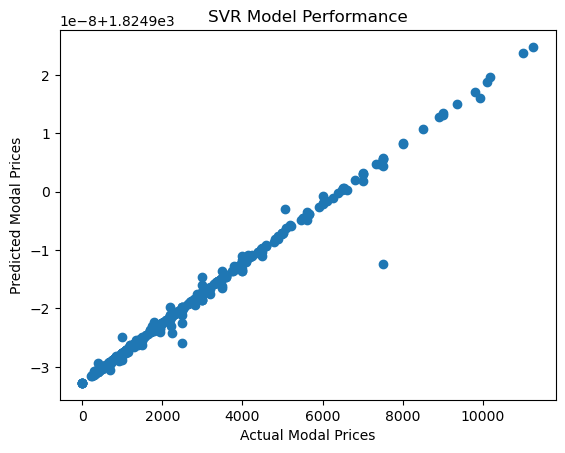

In [5]:
# Create a scatter plot of the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Modal Prices")
plt.ylabel("Predicted Modal Prices")
plt.title("SVR Model Performance")
plt.show()

SVR Model Performance
One way to visualize the performance of the SVR model is to create a scatter plot of the actual modal prices vs. the predicted modal prices. Here's some example code for creating this plot using Matplotlib:


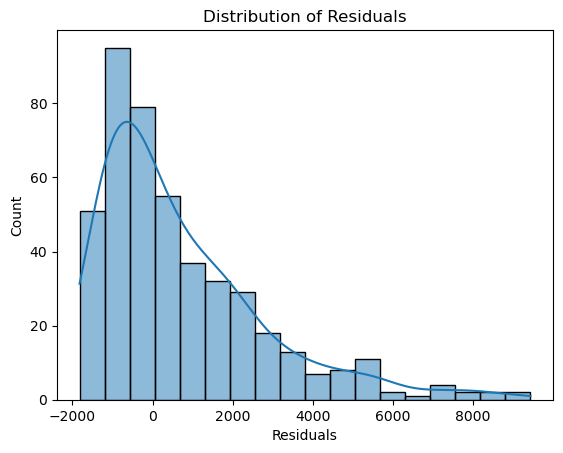

In [6]:
# Calculate the residuals
residuals = y_test - y_pred

# Create a density plot of the residuals
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

Distribution of Residuals
One way to assess the accuracy of the SVM model is to create a histogram or density plot of the residuals, which are the differences between the predicted and actual modal prices. A well-fitting model will have residuals that are normally distributed around zero. Here's some example code for creating a density plot of the residuals using Seaborn:

# K-Nearest Neighbors (KNN)

In [7]:
# Split the data into training and testing sets
X = data.drop("modal_price", axis=1)
y = data["modal_price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# One-hot encode the categorical data
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(handle_unknown='ignore'), [0, 1, 2, 3, 4])], remainder='passthrough')
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test).toarray()

# Create the KNN model and train it
regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = regressor.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 192.37084349914213


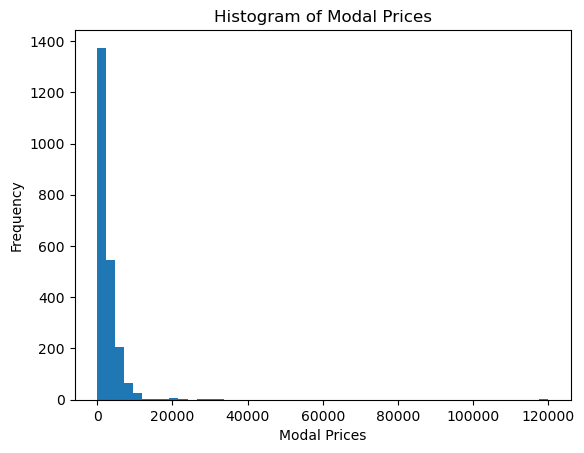

In [8]:
plt.hist(y, bins=50)
plt.xlabel("Modal Prices")
plt.ylabel("Frequency")
plt.title("Histogram of Modal Prices")
plt.show()

A histogram can help you visualize the distribution of modal prices in your data. To create a histogram, you can use the matplotlib library in Python. Here's some sample code:

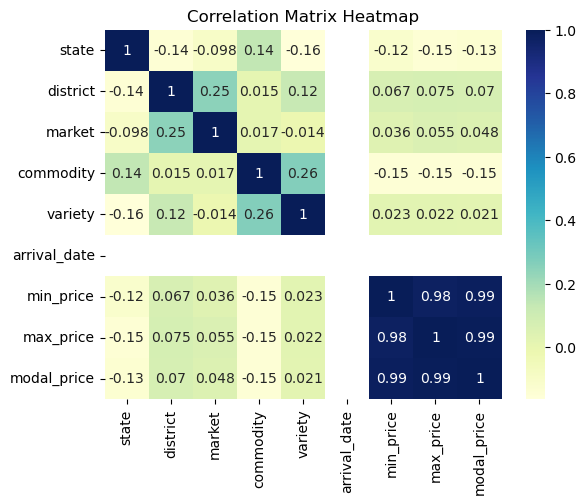

In [9]:
# Compute the correlation matrix
corr = data.corr()

# Create the heatmap
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix Heatmap")
plt.show()

The annot=True argument will display the numerical values of the correlation coefficients on the heatmap, and the cmap="YlGnBu" argument will set the color scheme of the heatmap. You can adjust the color scheme and other parameters to customize the appearance of the heatmap. The resulting heatmap will help you visualize the relationships between the different features in your data.